# Lab 9: Monday, June 7

Topics
  * More NumPy
  * A Sorting Algorithm
  * Euler's Method
  * NumPy Random

## Questions?

## 1. Sorting

Sorting algorithms are used to sort lists. 
Typically these lists contain numbers, and we want to sort them from least to greatest.

Write a function which checks whether a list of numbers is sorted.

In [1]:
def is_sorted_loop(num_list):
    for i in range(1, len(num_list)):
        if num_list[i-1] > num_list[i]:
            return False
    return True

In [2]:
def is_sorted(num_list):
    return num_list == sorted(num_list)

In [3]:
num_list_1 = [1,2,3]
print(is_sorted_loop(num_list_1))
print(is_sorted(num_list_1))

True
True


In [4]:
num_list_2 = [-10, 0, 57489235, 74839120543]
print(is_sorted_loop(num_list_2))
print(is_sorted(num_list_2))

True
True


In [5]:
num_list_3 = [7894123, -132874932, 0, 1324789]
print(is_sorted_loop(num_list_3))
print(is_sorted(num_list_3))

False
False


An extremely inefficient sorting algorithm is known as bogosort. 
The way this method works is
1. Check whether the list is sorted. If it is, you're done. Otherwise, go to step 2.
2. Randomly shuffle the list. Repeat step 1.

So, the idea is to shuffle the elements in the list until, by chance, the shuffle gives you the correct order.
Write a function `bogo` which implements this algorithm. 
(Hint: notice the method which has been imported for you.)

In [6]:
from random import shuffle

In [7]:
def bogo(num_list):
    while not is_sorted(num_list):
        shuffle(num_list)
        
    return num_list

In [8]:
print(bogo([5,4,3,2,1]))

[1, 2, 3, 4, 5]


In [9]:
print(bogo([8,7,6,5,4,3,2,1]))

[1, 2, 3, 4, 5, 6, 7, 8]


In [10]:
# this one may take a little while to run
print(bogo([10,9,8,7,6,5,4,3,2,1]))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


This is a slow approach.
Write code which compares the time it takes `bogo` to sort the list `[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]` to the time it takes the built-in `sorted` method.

In [11]:
import time
num_list = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [12]:
start = time.time()

bogo(num_list)

end = time.time()
print('It took', end - start, 'seconds for bogosort')

It took 47.594680070877075 seconds for bogosort


In [13]:
start = time.time()

sorted(num_list)

end = time.time()
print('It took', end-start, 'seconds for the built-in sort')

It took 0.00028705596923828125 seconds for the built-in sort


Run your timing cells a few times.
Do you always get the same results?

## 2. Euler's Method

Consider the following differential equation. $$ \frac{dy}{dx} = (y^2 - y - 2)(1-y)^2 $$

Using Euler's method, plot the differential equation for the following initial values: $$ y(0) = \frac{-5}{2}, \, -2, \, \frac{-3}{2}, \, -1, \, \frac{-1}{2}, \, 0, \, \frac{1}{2}, \, 1, \, \frac{3}{2}, \, 2. $$

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# write the gradient function
def grad(y_i):
    return ((y_i**2) - y_i - 2) * ((1 - y_i)**2)

Write a function which plots the above differential equation on the interval $[1,2.5]$ given an initial condition `y_0`.

In [16]:
def graph(y_0):
    x = np.linspace(1,2.5,500)
    h = x[1] - x[0]
    y = np.array([y_0])
    
    for i in range(len(x)):
        y_change = grad(y[i])
        y_new = y[i] + h*y_change
        y = np.append(y, y_new)
        
    plt.plot(x, y[1:], label=str(y_0))

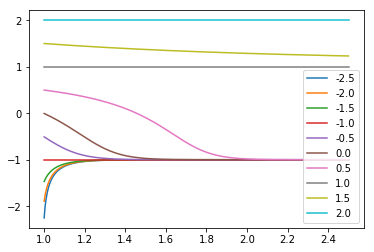

In [17]:
for j in range(-5, 5):
    graph(j/2)
    
plt.legend(loc='lower right')
plt.show()

The following differential equation models a population $P(t)$ which undergoes yearly seasonal fluctuations. 
$$\frac{dP}{dt} = P(t)(k\cdot\cos{2\pi t})$$

Taking $k=\frac{1}{10}$ and an initial population of 30, plot the population for time between $[0,10]$.

In [18]:
def grad(P_i, t_i, k):
    return P_i * k * np.cos(2*np.pi*t_i)

In [19]:
k = 1/10
P = np.array([30])  # initial population

In [20]:
t = np.linspace(0, 10, 1000)
h = t[1] - t[0]

In [21]:
for i in range(len(t)):
    P_change = grad(P[i], t[i], k)
    P_now = P[i] + h*P_change
    P = np.append(P, P_now)

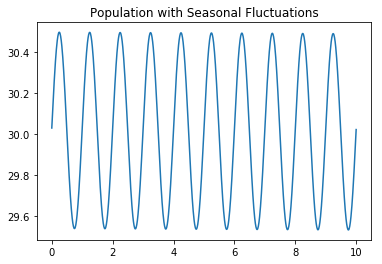

In [22]:
plt.plot(t, P[1:])
plt.title('Population with Seasonal Fluctuations')
plt.show()

## 3. A Game

You're playing a game with two friends that involves a 6-sided dice and two coins.
You assign "heads" a value of 1, and "tails" a values of 0.
For each round, you roll the dice, flip the two coins, and sum the three values.

  * You win the round if the total is 1, 5, or 8,
  * Your first friend wins if the total is 3 or 4,
  * Your second friend wins if the total is 2, 6, or 7
  
Write a function which simulates one round of the game.

In [23]:
import numpy.random as rand

In [24]:
def sample_round():
    '''
    Return 0 if you win, 
    1 if the first friend wins, and
    2 if the second friend wins
    '''
    
    you_win = [1, 5, 8]
    friend_wins_1 = [3, 4]
    friend_wins_2 = [2, 6, 7]
    
    # roll a dice
    dice = rand.randint(1,7)
    
    # flip two coins
    coin_1 = rand.randint(0,2)
    coin_2 = rand.randint(0,2)
    
    total = dice + coin_1 + coin_2
    
    if total in you_win:
        return 0
    elif total in friend_wins_1:
        return 1
    else:
        return 2

In [25]:
rand.seed(0)
print(sample_round())  # should print 2
print(sample_round())  # should print 1
print(sample_round())  # should print 2
print(sample_round())  # should print 0

2
1
2
0


Now write a function `simulate(num_rounds)` which calls the previous function `num_rounds` times and creates a pie chart of the win percentage for each player.

The syntax to create a pie chart is `plt.pie(win_total, labels=[you, friend 1, friend 2], autopct='%.2f')`, where `win_total` is a list of length 3: the first number is the number of times you win, the second number is the number of times your first friend wins, and the last number is the number of times your second friend wins.

Your function should show this plot and return the list `win_total`.

In [26]:
def simulate(num_rounds):
    win_total = [0, 0, 0]
    
    for i in range(num_rounds):
        winner = sample_round()
        win_total[winner] += 1
        
    plt.pie(win_total, labels=['you', 'friend 1', 'friend 2'], autopct='%.2f')
    # the `autopct` parameter adds nice percentage labels on the chart
    
    plt.show()
    return win_total

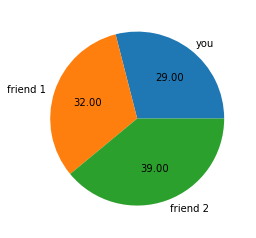

[29, 32, 39]

In [27]:
rand.seed(11)
simulate(100)  # [29, 32, 39], pie chart percentages are 29.00, 32.00, and 39.00

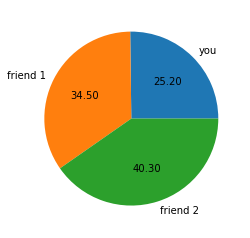

[252, 345, 403]

In [28]:
rand.seed(2021)
simulate(1000)  # [252, 345, 403], pie chart percentages are 25.20, 34.50, and 40.30

Is the game fair? 

Write a script now which calculates the probabilities for each possible score (from 1 up to 8). 
Can you use this to devise a scoring system for a fair game?
Check your work by simulating some rounds with your scoring system.

In [29]:
count = [0, 0, 0, 0, 0, 0, 0, 0]

for coin_1 in range(0,2):
    for coin_2 in range(0,2):
        for dice in range(1,7):
            
            total = coin_1 + coin_2 + dice
            count[total-1] += 1
            
possible_outcomes = sum(count)
probabilities = [round(freq/possible_outcomes,4) for freq in count]

print(probabilities)

[0.0417, 0.125, 0.1667, 0.1667, 0.1667, 0.1667, 0.125, 0.0417]


We want each player to have a probabilities of 0.33. 
So, a fair system is when 
  * You win if the total 3 or 4,
  * Your first friend wins if the total is 5 or 6,
  * Your second friend wins if the total is 1, 2, 7, or 8

In [30]:
def check_fair():
    
    you_win = [3, 4]
    friend_wins_1 = [5, 6]
    friend_wins_2 = [1, 2, 7, 8]
    
    # roll a dice
    dice = rand.randint(1,7)
    
    # flip two coins
    coin_1 = rand.randint(0,2)
    coin_2 = rand.randint(0,2)
    
    total = dice + coin_1 + coin_2
    
    if total in you_win:
        return 0
    elif total in friend_wins_1:
        return 1
    else:
        return 2

Use your simulate function to check over multiple rounds:

In [31]:
def simulate(num_rounds):
    win_total = [0, 0, 0]
    
    for i in range(num_rounds):
        winner = check_fair()
        win_total[winner] += 1
        
    plt.pie(win_total, labels=['you', 'friend 1', 'friend 2'], autopct='%.2f')
    # the `autopct` parameter adds nice percentage labels on the chart
    
    plt.show()
    return win_total

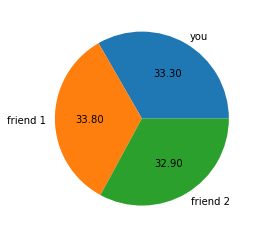

[333, 338, 329]

In [32]:
rand.seed(1234)
simulate(1000)  # [333, 338, 329], pie chart percentages are 33.30, 33.80, and 32.90

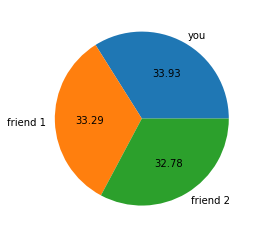

[3393, 3329, 3278]

In [33]:
rand.seed(33)
simulate(10000)  # [3393, 3329, 3278], pie chart percentages are 33.93, 33.29, and 33.78